In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Decision Trees

In [0]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 4)

max_depth = profundidad del arbol

In [0]:
from sklearn.model_selection import train_test_split

X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop('NUM_GRAVEDAD',axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [7]:
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
import graphviz 

libreria para visualizar grafos

In [0]:
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file =None,
                          feature_names=X.columns
                         )

In [10]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="NUM_CLASE <= 1.5\\nmse = 0.256\\nsamples = 26604\\nvalue = 1.477"] ;\n1 [label="NUM_DISENO <= 1.5\\nmse = 0.224\\nsamples = 18535\\nvalue = 1.677"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Y <= 6.259\\nmse = 0.209\\nsamples = 12002\\nvalue = 1.717"] ;\n1 -> 2 ;\n3 [label="X <= -75.576\\nmse = 0.194\\nsamples = 8125\\nvalue = 1.748"] ;\n2 -> 3 ;\n4 [label="mse = 0.211\\nsamples = 4156\\nvalue = 1.712"] ;\n3 -> 4 ;\n5 [label="mse = 0.173\\nsamples = 3969\\nvalue = 1.786"] ;\n3 -> 5 ;\n6 [label="RADICADO <= 1642394.5\\nmse = 0.234\\nsamples = 3877\\nvalue = 1.652"] ;\n2 -> 6 ;\n7 [label="mse = 0.244\\nsamples = 1526\\nvalue = 1.611"] ;\n6 -> 7 ;\n8 [label="mse = 0.225\\nsamples = 2351\\nvalue = 1.678"] ;\n6 -> 8 ;\n9 [label="CBML <= 1001.5\\nmse = 0.244\\nsamples = 6533\\nvalue = 1.603"] ;\n1 -> 9 ;\n10 [label="X <= -75.562\\nmse = 0.256\\nsamples = 2062\\nvalue = 1.499"] ;\n9 -> 10 ;\n11 [label="mse = 0.256

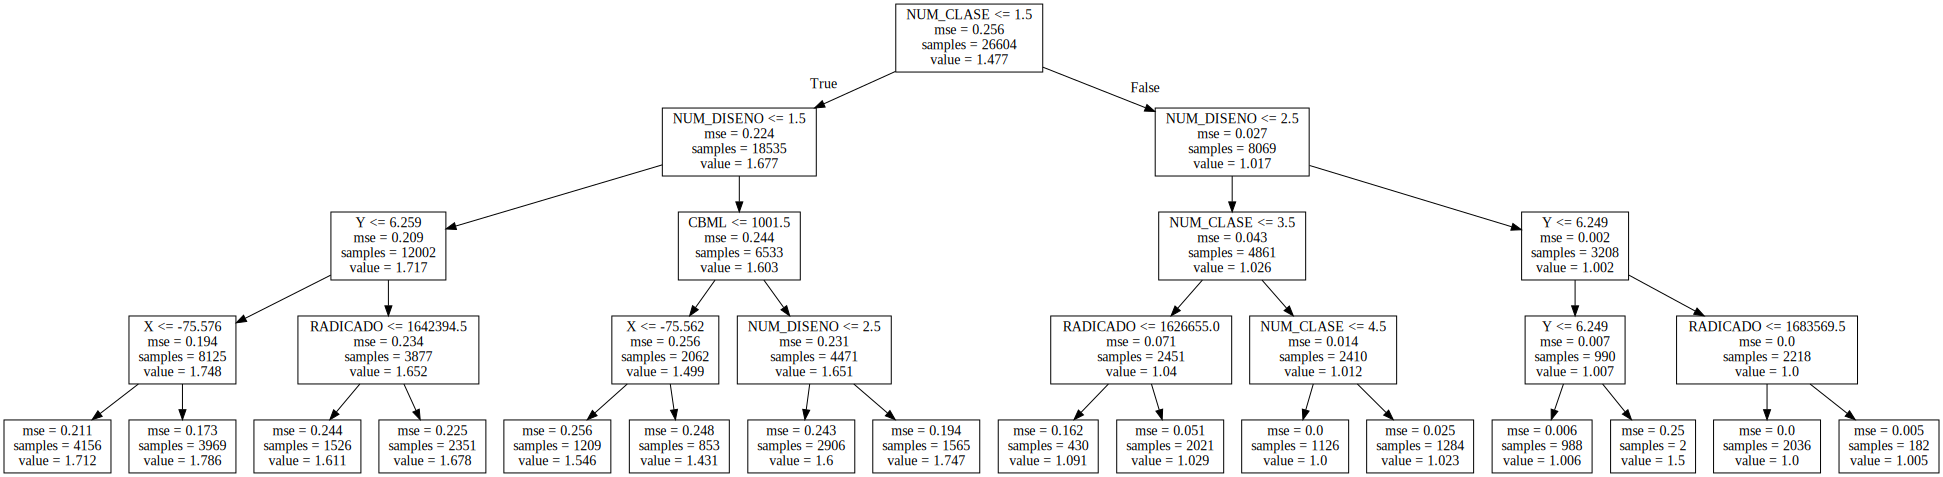

In [11]:
graphviz.Source(treedot)

nuestra mejor variable de predicion fue NUM_CLASE

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [23]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9107535399829182
0.36121173859907224


Mejor resultado que Lasso! Y ano tenemos Bias y tenemos un mejor score r2. Sin embargo tenemos una diferencia importante entre score de entrenamiento y test(overfit)

# Gradient Boosted Trees

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [20]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9126762301257099
0.36461608920634064


# Optimización de hiperparámetros

Buenas practicas del Gradient Boosted Trees, siguiendo el modelo

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [0]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,501,20)}

In [27]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

se hace por que con GridSearch se busca el mejor valor para la cantidad de estimadores 

In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

parametros de los arboles

In [0]:
gsearch1 = GridSearchCV(estimador,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [31]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [34]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params'])), gsearch1.best_params_, gsearch1.best_score_

([(0.3779695805388923, 0.008022776449313412, {'n_estimators': 20}),
  (0.389617247836085, 0.009169043928205691, {'n_estimators': 40}),
  (0.3910775225549353, 0.009871768676890822, {'n_estimators': 60}),
  (0.3918268903671054, 0.01015663527092471, {'n_estimators': 80}),
  (0.3927176219606883, 0.01039419981578081, {'n_estimators': 100}),
  (0.39364348010901773, 0.010706710054520055, {'n_estimators': 120}),
  (0.39371920465144716, 0.010953254246164144, {'n_estimators': 140}),
  (0.3941020840798166, 0.0112749805030889, {'n_estimators': 160}),
  (0.39415265189701926, 0.011434119971208875, {'n_estimators': 180}),
  (0.3943182231926172, 0.011881806392778665, {'n_estimators': 200}),
  (0.3949337951533762, 0.011980834567221743, {'n_estimators': 220}),
  (0.39511864114044776, 0.01216096970906808, {'n_estimators': 240}),
  (0.39531324574254856, 0.012476890591107829, {'n_estimators': 260}),
  (0.39562145223944534, 0.012969274885378535, {'n_estimators': 280}),
  (0.39586305133165045, 0.013450140773

 mejoramos nuestro performarce 0.4



In [0]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [36]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9107535399829182
0.36121173859907224


In [0]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=400)

In [41]:
estimador.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
estimador.score(X_test, y_test)

0.4008068257681944

Conclusion final

en Score r2 gracias al haber trabajado sobre las features y tomar varios modelos y finalmente con gsearch1 al haber optimizado los parametros de nuestro modelo